In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
import geopandas as gpd
import contextily as cx
from PIL import Image
from matplotlib.ticker import FormatStrFormatter

from PlotsForPaper_Functions import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# import sys
# sys.path.append("ProcessModelResults/")
# from my_functions import *

In [3]:
methods_dict = {'Idealised': ['6h_sp_fl_0.1', '6h_sp_fl_0.2', '6h_sp_fl_0.3', '6h_sp_fl_0.4','6h_sp_c_0.5',
          '6h_sp_bl_0.6','6h_sp_bl_0.7','6h_sp_bl_0.8','6h_sp_bl_0.9'],
                'Observed':['6h_feh_singlepeak', '6h_c1','6h_c2','6h_c3','6h_c4', '6h_c5', '6h_c6','6h_c7',
             '6h_c8','6h_c9','6h_c10', '6h_c11', '6h_c12','6h_c13','6h_c14','6h_c15'], 
               'SinglePeak_Scaled':['6h_sp_+0%','6h_sp_+5%','6h_sp_+10%','6h_sp_+15%','6h_sp_+20%']}

## Plot catchments

In [4]:
# Catchment boundaries
lindyke_gdf = gpd.read_file('../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/CatchmentLinDyke_exported.shp')
wykebeck_gdf = gpd.read_file('../../../FloodModelling/WykeBeckModels/Model_IdealisedProfiles/WykeBeckCatchment.shp')
# Watercourses (for whole country)
watercourses = gpd.read_file('../../../FloodModelling/ExtraData/Watercourses/WatercourseLink.shp')
# Boundary of whole city, for centering map
leeds_gdf =  gpd.read_file('../../../FloodModelling/ExtraData/LeedsBoundary/LeedsCatchments.shp')
# Profile lines
profileLines_LD = gpd.read_file('../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/Features/Profile Lines.shp')
profileLines_WB = gpd.read_file('../../../FloodModelling/WykeBeckModels/Model_IdealisedProfiles/Features/Profile Lines.shp')

# fig, ax = plt.subplots(figsize=(24, 10))
# #plt.rcParams['figure.dpi']=1200 
# leeds_gdf.plot(ax=ax, facecolor="none", linewidth=0.01, edgecolor ='black')
# for catchment_gdf in [wykebeck_gdf, lindyke_gdf]:
#     catchment_gdf.plot(ax=ax, facecolor="none", linewidth=1, edgecolor ='black')
#     # get watercourses just for this catchment
#     watercourses_clip = gpd.clip(watercourses, catchment_gdf)
#     watercourses_clip.plot(ax=ax, linewidth=1)
#     # add basemap
#     ax.axis('off');

# profileLines_LD.plot(ax=ax, linewidth=3, color='red') 
# profileLines_WB.plot(ax=ax, linewidth=3, color='red') 
# cx.add_basemap(ax, crs = catchment_gdf.crs.to_string(), url = cx.providers.OpenTopoMap, zoom=12)    
# # fig.savefig("FigsForPaper/Catchments.png",bbox_inches='tight', dpi=1200)
# # fig.savefig("Figs/CatchmentLocations/Catchments_lowres.png",bbox_inches='tight')
# plt.close()

In [5]:
# # Opens a image in RGB mode
# im = Image.open("FigsForPaper/Catchments.png")#.convert('L')
 
# #Image.crop(left, top, right, bottom)    
# left = 260
# top = 260
# right = 840
# bottom = 640
   
# im = im.crop((left, top, right, bottom)) 
# im.save("FigsForPaper/Catchments_test.png",bbox_inches='tight', dpi=1200)    

## Plot profiles (idealised and observed) - for Lin Dyke (but they will be v similar in both cases)

In [6]:
catchment_name = 'LinDyke'

In [7]:
feh_profile = pd.read_csv("../CreateSyntheticRainfallEvents/FEHProfiles/LinDyke/6hr_100yrRP/PreLossRemoval/6hr_100yrRP_6.01h_1mintimestep.csv".format(catchment_name))

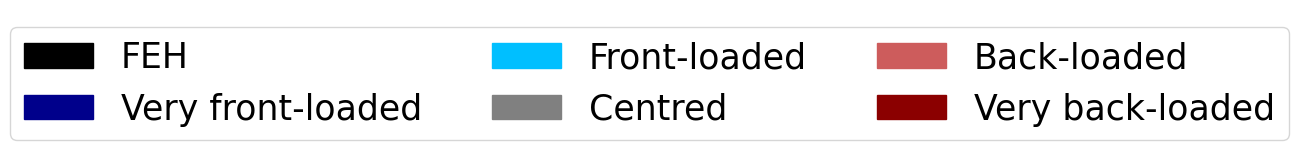

In [8]:
# set up figure instance
fig, axs = plt.subplots(figsize=(3,1))
##############
colors_leg = ['black', 'darkblue', 'deepskyblue','grey', 'indianred', 'darkred']
texts = ['FEH', 'Very front-loaded','Front-loaded','Centred', 'Back-loaded', 'Very back-loaded'] 
patches = [ mpatches.Patch(color=colors_leg[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, ncol=3, prop={'size': 25});

# Setting the values for all axes.
axs.axis('off')

##############
# Save figure
##############
# fig.savefig("Figs/Profiles/Idealised_Observed_Profiles_{}.png".format(catchment_name),bbox_inches='tight')  
fig.savefig("Figs/Profiles/legend.png",bbox_inches='tight')   

In [9]:
# test = pd.DataFrame({'Rainfall':observed_profile['Rainfall'].unique(), 'Minute' : list(range(1,361,30))})

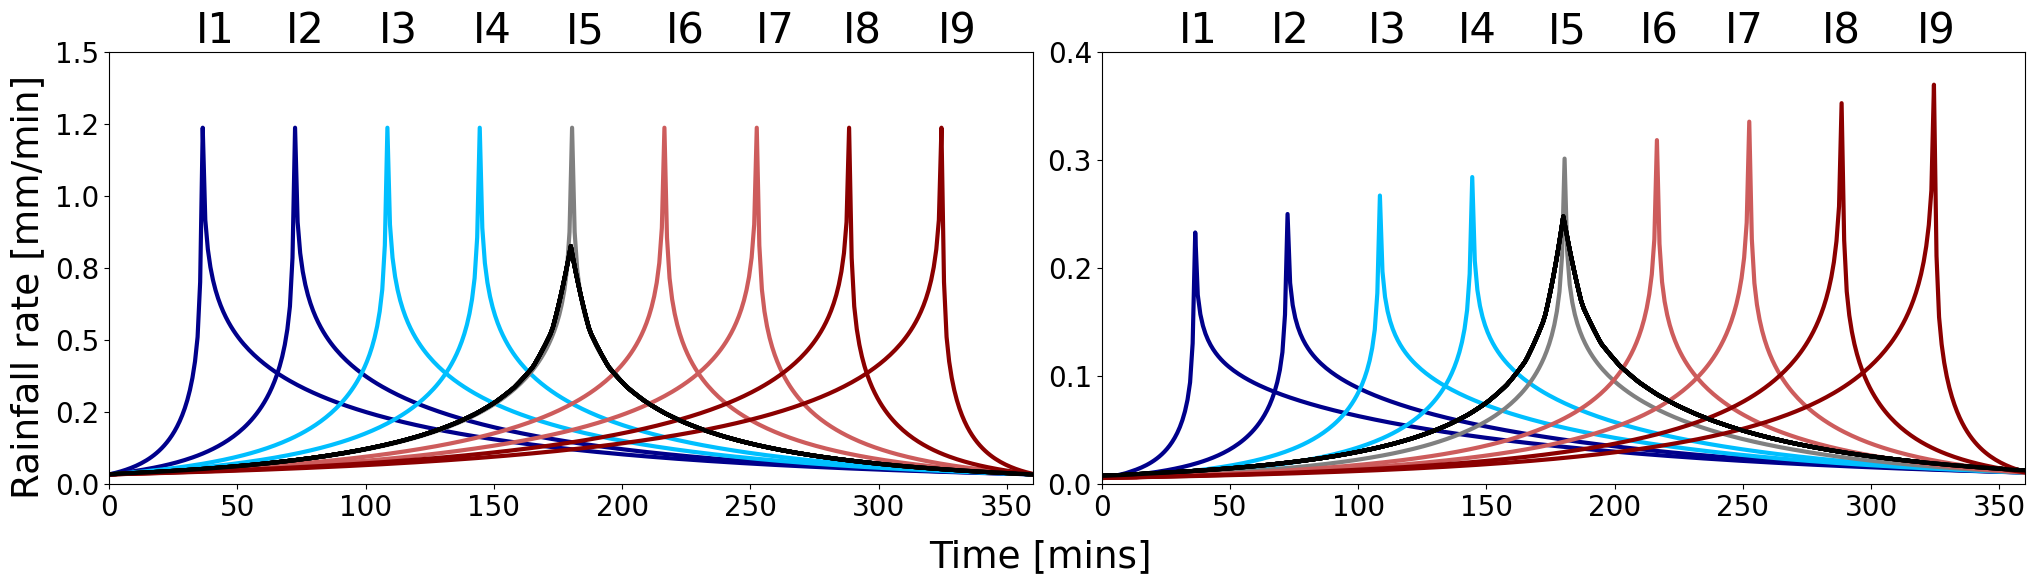

In [10]:
# Set up colours
colors_obs = ["darkblue","indianred","deepskyblue","darkred","darkred","grey","darkred","darkblue","grey","deepskyblue","deepskyblue","indianred","grey","indianred","darkblue"]
colors_idealised = ['darkblue']*2 + ['deepskyblue']*2 + ['grey']+ ['indianred']*2+['darkred']*2
colors_ls = {'Observed': colors_obs, 'Idealised': colors_idealised}

# set up figure instance
fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize=(20,5), sharey=False)

for axes_number, method in enumerate(methods_dict['Idealised']):
    # Read in data
    idealised_profile = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PreLossRemoval/{}.csv".format(catchment_name, method), names = ['Time', 'Rainfall'])
    axs[0].plot(np.array(range(361))+0.5,idealised_profile['Rainfall'], color=colors_idealised[axes_number], linewidth = 3)   
    # Add FEh profile
    axs[0].plot(range(0,361), feh_profile['100 year design rainfall - FEH 2013 model'][:361], color = 'black', linewidth=3,
            linestyle = 'solid') 
    axs[0].tick_params(axis='both', which='major', labelsize=20)
    #axs[0].set_ylim(-0.05,1.35)  
    axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ymin, ymax = plt.ylim()
    
    
    post_loss_removal = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PostLossRemoval/{}_urban.csv".format(catchment_name, method))
    axs[1].plot(np.array(range(361))+0.5,post_loss_removal['Total net rain mm (Observed rainfall - 01/08/2022) - urbanised model'], color=colors_idealised[axes_number], linewidth = 3)   
#     axs[1].set_xlabel('Time [mins]')
#     axs[1].set_ylabel('Rainfall rate [mm/min]')
#     axs[1].set_title('Rainfall rate [mm/min] post loss removal')
    axs[1].plot(range(0,361), feh_profile['Total net rain mm (100 year) - urbanised model'][:361], color = 'black', linewidth=3,
        linestyle = 'solid') 
#     axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    axs[1].tick_params(axis='both', which='major', labelsize=20)
    
fig.text(0.5, -0.06, 'Time [mins]', ha='center', fontsize = 27)
fig.text(-0.015, 0.5, 'Rainfall rate [mm/min]', va='center', rotation='vertical', fontsize = 27)

fig.tight_layout() 

custom_xlim = (0, 360)
custom_ylim = (-0, 1.5)

# Setting the values for all axes.
plt.setp(axs[0], xlim=custom_xlim, ylim=custom_ylim)
plt.setp(axs[1], xlim=custom_xlim, ylim=(0,0.4))
# axs.axis('off')

axs[0].annotate('I1', xy=(34, 1.5), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[0].annotate('I2', xy=(69, 1.5), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[0].annotate('I3', xy=(105, 1.5), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[0].annotate('I4', xy=(142,1.5), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[0].annotate('I5', xy=(178, 1.5), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[0].annotate('I6', xy=(217,1.5), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[0].annotate('I7', xy=(252, 1.5), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[0].annotate('I8', xy=(286, 1.5), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[0].annotate('I9', xy=(323, 1.5), textcoords='data', rotation=0, va='bottom', fontsize=30)

axs[1].annotate('I1', xy=(30, 0.4), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[1].annotate('I2', xy=(66, 0.4), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[1].annotate('I3', xy=(104, 0.4), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[1].annotate('I4', xy=(139, 0.4), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[1].annotate('I5', xy=(174, 0.4), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[1].annotate('I6', xy=(210, 0.4), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[1].annotate('I7', xy=(243, 0.4), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[1].annotate('I8', xy=(281, 0.4), textcoords='data', rotation=0, va='bottom', fontsize=30)
axs[1].annotate('I9', xy=(318, 0.4), textcoords='data', rotation=0, va='bottom', fontsize=30)

##############
# Save figure
##############
fig.savefig("Figs/Profiles/Idealised_Profiles_{}_pre_and_post_lossremoval.png".format(catchment_name),bbox_inches='tight')  


In [11]:
# # Set up colours
# colors_obs = ["darkblue","indianred","deepskyblue","darkred","darkred","grey","darkred","darkblue","grey","deepskyblue","deepskyblue","indianred","grey","indianred","darkblue"]
# colors_idealised = ['darkblue']*2 + ['deepskyblue']*2 + ['grey']+ ['indianred']*2+['darkred']*2
# colors_ls = {'Observed': colors_obs, 'Idealised': colors_idealised}

# # set up figure instance
# fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize=(13,5), sharey=True)

# for axes_number, method in enumerate(methods_dict['Idealised']):
#     # Read in data
#     idealised_profile = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PreLossRemoval/{}.csv".format(catchment_name, method), names = ['Time', 'Rainfall'])
#     axs[0].plot(np.array(range(361))+0.5,idealised_profile['Rainfall'], color=colors_idealised[axes_number], linewidth = 3)   
#     # Add FEh profile
#     axs[0].plot(range(0,361), feh_profile['100 year design rainfall - FEH 2013 model'][:361], color = 'black', linewidth=3,
#             linestyle = 'solid') 
#     axs[0].tick_params(axis='both', which='major', labelsize=20)
#     #axs[0].set_ylim(-0.05,1.35)  
#     axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
# for cluster_number in range(1,16):
#     # Read in pre and post loss removal data
#     observed_profile = pd.read_csv('../CreateSyntheticRainfallEvents/ObservedProfiles/{}/6hr_100yrRP/PreLossRemoval/cluster{}.csv'.format(catchment_name, cluster_number), names = ['Time', 'Rainfall'])
# #     test = pd.DataFrame({'Rainfall':observed_profile['Rainfall'].unique(), 'Minute' : list(range(1,361,30))})
#     axs[1].plot(observed_profile['Time'],observed_profile['Rainfall'], color=colors_obs[cluster_number-1], linewidth = 3)   
#     #axs[1].set_ylim(-0.05,1.35)    
#     axs[1].tick_params(axis='both', which='major', labelsize=20)
    
#     # loop through tickers and axes
#     axs[1].plot(range(0,361), feh_profile['100 year design rainfall - FEH 2013 model'][:361], color = 'black', linewidth=2.5, linestyle = 'solid')

# # fig.text(0.5, -0.05, 'Time [mins]', ha='center', fontsize = 25)
# fig.text(-0.03, 0.5, 'Rainfall rate [mm/min]', va='center', rotation='vertical', fontsize = 25)

# fig.tight_layout() 

# custom_xlim = (0, 360)
# custom_ylim = (-0, 1.6)

# # Setting the values for all axes.
# plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim)
# # axs.axis('off')

# ##############
# # Save figure
# ##############
# fig.savefig("Figs/Profiles/Idealised_Observed_Profiles_{}_prelossremoval.png".format(catchment_name),bbox_inches='tight')  


## Find flooded extent stats

In [12]:
cluster_results_ip_ld= pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/LinDyke/allclusters_summary_notwetlands.csv",
                                  keep_default_na=False)
cluster_results_ip_wb= pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/WykeBeck/allclusters_summary_export.csv",
                                  keep_default_na=False)
cluster_results_op_ld= pd.read_csv("../ProcessModelResults/Outputs/Data/ObservedProfiles/LinDyke/allclusters_summary_notwetlands.csv",
                                  keep_default_na=False)
cluster_results_op_wb= pd.read_csv("../ProcessModelResults/Outputs/Data/ObservedProfiles/WykeBeck/allclusters_summary_export.csv",
                                  keep_default_na=False)

In [13]:
def find_diff_in_flooded_area(cluster_results, most_fl_str, most_bl_str, flooded_area_col):
    most_front_loaded_flooded_area = cluster_results[cluster_results['Cluster_num']==most_fl_str][flooded_area_col].values[0]
    most_back_loaded_flooded_area = cluster_results[cluster_results['Cluster_num']==most_bl_str][flooded_area_col].values[0]
    print(round(most_back_loaded_flooded_area - most_front_loaded_flooded_area, 3), "km2")
    print(((float(most_back_loaded_flooded_area)-most_front_loaded_flooded_area)/most_front_loaded_flooded_area)*100)

print('Idealised, Lin Dyke')
find_diff_in_flooded_area(cluster_results_ip_ld, 'FL1', 'BL9', 'FloodedArea')   
print('Idealised, Wyke Beck')
find_diff_in_flooded_area(cluster_results_ip_wb, 'FL1', 'BL9', 'FloodedArea')       
    
print('Observed, Lin Dyke')
find_diff_in_flooded_area(cluster_results_op_ld, '6h_c8', '6h_c5', 'FloodedArea')
print('Observed, Wyke Beck')
find_diff_in_flooded_area(cluster_results_op_wb, '6h_c8', '6h_c5','FloodedArea')   

Idealised, Lin Dyke
0.142 km2
15.139178993136959
Idealised, Wyke Beck
0.338 km2
13.133877154091003
Observed, Lin Dyke
0.222 km2
24.671771516273807
Observed, Wyke Beck
0.613 km2
23.645779980129475


## Plot flooded extent

In [14]:
cluster_results_ip_ld['Cluster_num'] = ['I1','I2','I3','I4','I5','I6','I7','I8','I9',]
cluster_results_ip_wb['Cluster_num'] = ['I1','I2','I3','I4','I5','I6','I7','I8','I9',]
cluster_results_op_ld['Cluster_num'] = ['FEH', 'O1','O8','O15','O3','O11','O10','O9','O13','O6','O2','O12','O14','O4','O7','O5',]
cluster_results_op_wb['Cluster_num'] = ['FEH', 'O1','O8','O15','O3','O11','O10','O9','O13','O6','O2','O12','O14','O4','O7','O5',]

In [15]:
cluster_results_ld_ls = [cluster_results_ip_ld,cluster_results_op_ld]
cluster_results_wb_ls = [cluster_results_ip_wb,cluster_results_op_wb]

cluster_results_ip_ls = [cluster_results_ip_ld,cluster_results_ip_wb]
cluster_results_op_ls = [cluster_results_op_ld,cluster_results_op_wb]

catchment_name_ls = ['LinDyke','WykeBeck', 'LinDyke','WykeBeck']
cluster_results_ls_ls = [cluster_results_ip_ls, cluster_results_op_ls]

### Create separate legend (to add to plots in Overleaf)

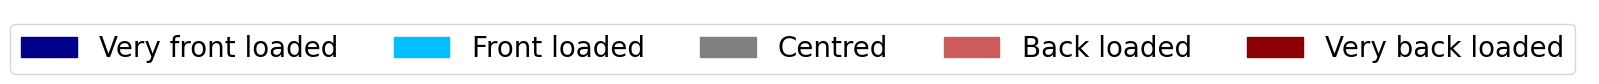

In [16]:
colors = {'Very front loaded':'darkblue', 'Front loaded':'deepskyblue',
         'Centred': 'grey', 'Back loaded': 'indianred', 'Very back loaded':'darkred'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
fig, ax = plt.subplots(figsize = (5,0.1), gridspec_kw={'hspace': 0.2, 'wspace': 0.03})
ax.legend(handles, labels, ncol=5, fontsize=20)
plt.axis('off')
fig.savefig("Figs/FloodedAreaBarCharts/legend.PNG", bbox_inches='tight')

In [17]:
def plot_flooded_extent_2catchments(cluster_results_ls, urban_str, catchment_name, catchment_name_short,  ylim, percent_adjusts,
                                   label_height_adjusters, title = True):
    
    fig, axs = plt.subplots(ncols= 2, nrows=1, sharey=True,figsize = (10,4), gridspec_kw={'hspace': 0.2, 'wspace': 0.03})
    profile_name_ls = ['Idealised','Observed']
    
    ##############################
    # Plot number of flooded cells
    ##############################
    for number, ax in enumerate(axs.flatten()):

        cluster_results =  cluster_results_ls[number]
        cluster_results = cluster_results.replace(to_replace='paleturquoise', value='deepskyblue', regex=True)

        
        y_pos = np.arange(len(cluster_results['Cluster_num']))
        ax.bar(y_pos, cluster_results['{}FloodedArea'.format(urban_str)].values.tolist(), width = 0.9, 
               color = cluster_results['colour'])
        # Create names on the x-axis
        ax.set_xticks(y_pos)
        if number == 0:
            rotation = 0
        else:
            rotation = 75
        ax.set_xticklabels(cluster_results['Cluster_num'], fontsize =10, rotation = rotation)
        ax.tick_params(axis='both', which='major', labelsize=12.5)
        xlocs, xlabs = plt.xticks(y_pos)
        xlocs=[i+1 for i in range(0,19)]
        xlabs=[i/2 for i in range(0,19)]
                  
        for i, v in enumerate(cluster_results['{}FloodedArea'.format(urban_str)].values.tolist()):
            ax.text(xlocs[i] - percent_adjusts[number], v * label_height_adjusters[number], 
                    str(cluster_results["%Diff_{}FloodedArea_fromSP_formatted".format(urban_str)][i]), 
                        fontsize = 14, rotation =90)
        
        if urban_str == '':
            ax.set_ylim(1,ylim)
        else :
            ax.set_ylim(0,ylim)
        
        if title ==True:
            ax.set_title(profile_name_ls[number],fontsize=15)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    fig.text(0.06, 0.5, 'Flooded area (km2)', fontsize=15, va='center', rotation='vertical')   
    if title == True:
        fig.suptitle(catchment_name, x =0.5, y= 1.07, fontsize=20)
    
#     if urban_str != '':
#         urban_str = '_' + urban_str
    
    # Save
    fig.savefig("Figs/FloodedAreaBarCharts/{}_{}.PNG".format(catchment_name_short, urban_str), bbox_inches='tight')
    

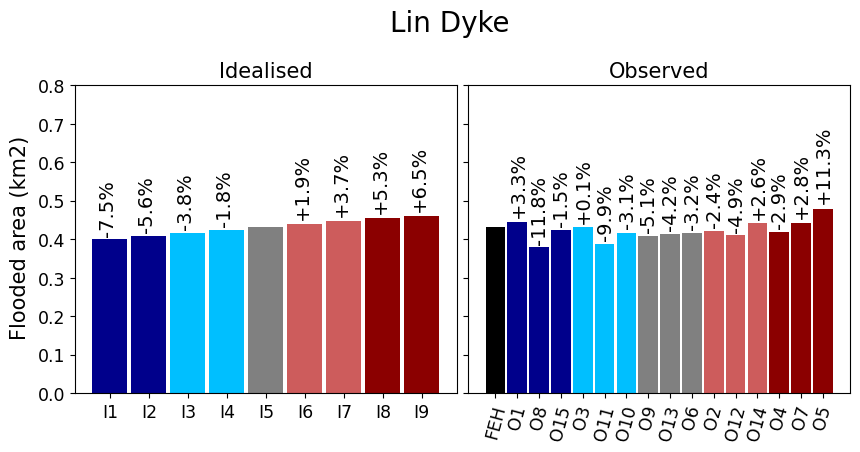

In [18]:
plot_flooded_extent_2catchments(cluster_results_ld_ls, 'Urban', 'Lin Dyke','LD',ylim =0.8, 
                                # One controls left 2, second controls right 2
                                percent_adjusts = [1.3, 1.4], 
                                # Left = idealised, LD, right = LD, observed
                                label_height_adjusters = [1.05, 1.05])

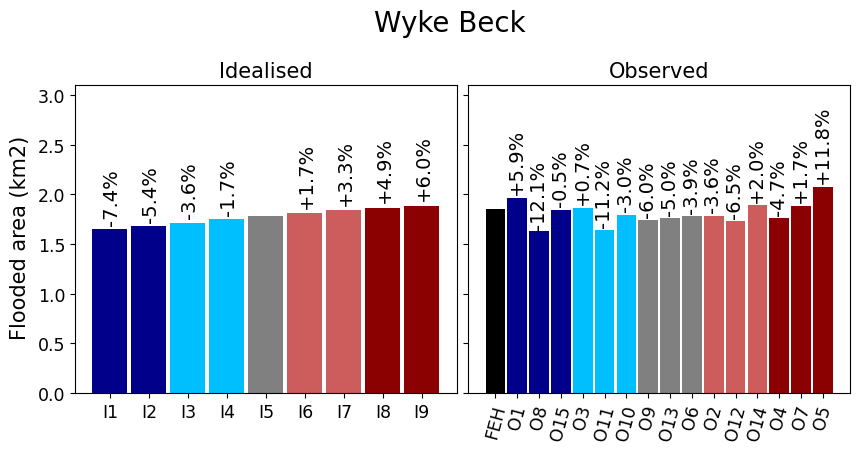

In [19]:
plot_flooded_extent_2catchments(cluster_results_wb_ls, 'Urban', 'Wyke Beck','WB',ylim =3.1, 
                                # One controls left 2, second controls right 2
                                percent_adjusts = [1.2, 1.47], 
                                # Left = idealised, LD, right = LD, observed
                                label_height_adjusters = [1.05, 1.04])

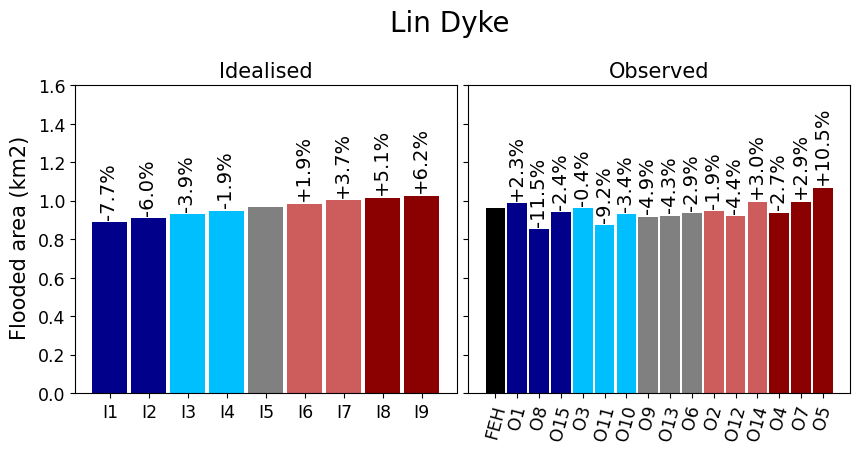

In [20]:
plot_flooded_extent_2catchments(cluster_results_ld_ls, 'Notwater', 'Lin Dyke','LD',ylim =1.6, 
                                # One controls left 2, second controls right 2
                                percent_adjusts = [1.29, 1.46], 
                                # Left = idealised, LD, right = LD, observed
                                label_height_adjusters = [1.04, 1.04])

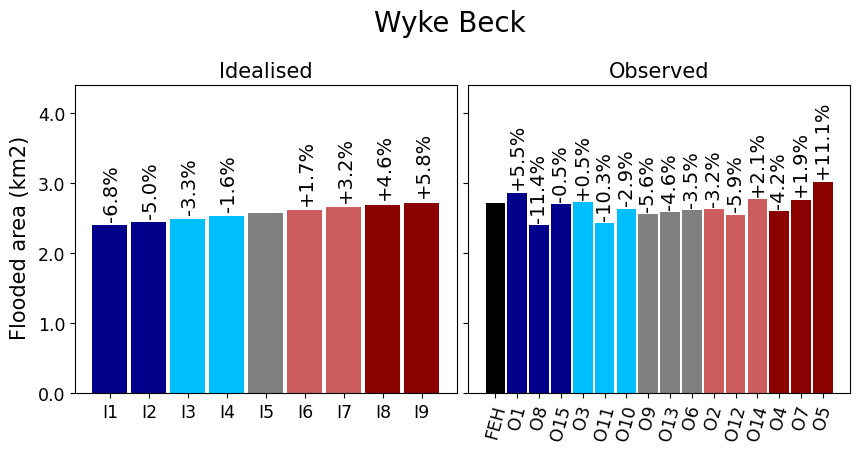

In [21]:
plot_flooded_extent_2catchments(cluster_results_wb_ls, 'Notwater', 'Wyke Beck','WB',ylim =4.4, 
                                # One controls left 2, second controls right 2
                                percent_adjusts = [1.2, 1.45], 
                                # Left = idealised, LD, right = LD, observed
                                label_height_adjusters = [1.05, 1.04])

In [22]:
# plot_flooded_extent_2catchments(cluster_results_ip_ls, '', 'Idealised','IP',ylim = 2.1, 
#                                 # One controls left 2, second controls right 2
#                                 percent_adjusts = [1.2, 1.45], 
#                                 # Left = idealised, LD, right = LD, observed
#                                 label_height_adjusters = [1.02, 1.015])

In [23]:
# plot_flooded_extent_2catchments_2profilesets(cluster_results_ls_ls, '', 'Idealised','IP',ylim = 3.9, 
#                                 # One controls left 2, second controls right 2
#                                 percent_adjustments = [1.3,1.4], 
#                                 # Left = idealised, LD, right = LD, observed
#                                 label_height_adjusters_x = [1.03, 1.02], 
#                                 # Left = idealised, WB, right = WB, observed
#                                 label_height_adjusters_y = [1.02,1.02], set_title=True)

In [24]:
# plot_flooded_extent_2catchments_2profilesets(cluster_results_ls_ls, 'Urban', 'Idealised','IP',ylim = 2.7, 
#                                 # One controls left 2, second controls right 2
#                                 percent_adjustments = [1.2,1.4], 
#                                 # Left = idealised, LD, right = LD, observed
#                                 label_height_adjusters_x = [1.1, 1.1], 
#                                 # Left = idealised, WB, right = WB, observed
#                                 label_height_adjusters_y = [1.04,1.03])

In [25]:
# plot_flooded_extent_2catchments_2profilesets(cluster_results_ls_ls, 'Notwater', 'Idealised','IP',ylim = 3.9, 
#                                 # One controls left 2, second controls right 2
#                                 percent_adjustments = [1.2,1.4], 
#                                 # Left = idealised, LD, right = LD, observed
#                                 label_height_adjusters_x = [1.07, 1.06], 
#                                 # Left = idealised, WB, right = WB, observed
#                                 label_height_adjusters_y = [1.03,1.04])

## Plot Flood Severity

In [26]:
individual_cell_values_ip_ld= pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/LinDyke/individual_cell_values_notwetlands.csv")
individual_cell_values_ip_wb=pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/WykeBeck/individual_cell_values_notwetlands.csv")
individual_cell_values_op_ld= pd.read_csv("../ProcessModelResults/Outputs/Data/ObservedProfiles/LinDyke/individual_cell_values_notwetlands.csv")
individual_cell_values_op_wb= pd.read_csv("../ProcessModelResults/Outputs/Data/ObservedProfiles/WykeBeck/individual_cell_values_notwetlands.csv")

In [27]:
di_i = {"6h_sp_bl_0.9": "I9", "6h_sp_fl_0.1": "I1"}
di_o = {"6h_c5": "O5", "6h_c8": "O8"}

individual_cell_values_ip_ld.replace({"short_id": di_i},inplace=True)
individual_cell_values_ip_wb.replace({"short_id": di_i},inplace=True)
individual_cell_values_op_ld.replace({"short_id": di_o},inplace=True)
individual_cell_values_op_wb.replace({"short_id": di_o},inplace=True)

In [28]:
# individual_cell_values_ip = [individual_cell_values_ip_ld,individual_cell_values_ip_wb]
# individual_cell_values_op = [individual_cell_values_op_ld,individual_cell_values_op_wb]
# individual_cell_values_sps = [individual_cell_values_sps_ld,individual_cell_values_sps_wb]

individual_cell_values_ip_dict = {'LinDyke': individual_cell_values_ip_ld,
                             'WykeBeck': individual_cell_values_ip_wb}
individual_cell_values_op_dict = {'LinDyke': individual_cell_values_op_ld,
                             'WykeBeck': individual_cell_values_op_wb}

### Plot histograms

In [29]:
def plot_histogram_weighted (individual_cell_values_dict, profiles_name, profiles_name_short, smallest_method,
                    largest_method, filter_out_water, title = True):
    
    catchments = ['LinDyke', 'WykeBeck', 'LinDyke', 'WykeBeck']
    variables = ['Depth', 'Depth', 'Velocity', 'Velocity']
    
    # Set up figure
    fig, axs = plt.subplots(ncols= 2, nrows=2, sharey=False,figsize =(11,6), gridspec_kw={'hspace':0.5, 'wspace': 0.3})
    dfs=[]
    
    for ax_number, ax in enumerate(axs.flatten()):
        variable_name = variables[ax_number]
        catchment_name = catchments[ax_number]
        
        # Get data
        individual_cell_values =  individual_cell_values_dict[catchment_name]

        # Filter out cells which are water
        if filter_out_water == True:
            individual_cell_values = individual_cell_values[individual_cell_values['Water_class']==15]
        
        # Define bins
        if variable_name == 'Depth':
            bins = [0.1,0.3,0.6,1.2, 3]
            b = [f'{i}-{j}m' for i, j in zip(np.round(bins,1)[:], np.round(bins,1)[1:])] 
            b = [f'{i}-{j}m' for i, j in zip(bins[:], bins[1:])] 
            b = b + ['>3m']
            label = 'Depth (m)'
            
        elif variable_name =='Velocity':
            bins =[0, 0.25, 0.5, 2, 3]
            b = [f'{i}-{j}m/s' for i, j in zip(np.round(bins,2)[:], np.round(bins,2)[1:])] 
            b = b + ['>3m/s']
            label = 'Velocity (m/s)'

        # Set weights differently to account for different cell sizes 
        if catchment_name =='WykeBeck':
            weight = 4 * 0.000001 
        elif catchment_name == 'LinDyke':
            weight = 0.000001 

        # Get the 2 most extreme scenario results separately
        extremes = individual_cell_values.loc[individual_cell_values['short_id'].isin([smallest_method, largest_method])].copy()
        print(len(extremes[extremes['short_id']==largest_method]))
        
        # Get so the most/least extreme appear in plots with the colours in same order
        if profiles_name =='SinglePeak_Scaled':
            extremes.sort_values(by=['short_id'],ascending =True, inplace=True)
        if profiles_name =='Observed':
            extremes.sort_values(by=['short_id'],ascending =True, inplace=True)
        else:
            extremes.sort_values(by=['short_id'],ascending=False, inplace=True)
        
        # Plot
        ls_values = sns.histplot(ax=ax, data=extremes, x=variable_name, hue='short_id',stat='count',
                                 element = 'step', weights=weight,linewidth=2, fill =False,log_scale=False,
                                 bins=bins, palette = ['darkred','darkblue']).get_lines()
        ax.set_ylabel('Area (km2)')
        ax.set_xticks(bins)
        ax.tick_params(axis='x', rotation=55)
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        ax.set_xlabel (label)
        
        ax.get_legend().set_title("")
        
        # Set title
        ax.set_title(catchment_name, fontsize=15)

        #### Get change percentages
        most_extreme_ls = []
        least_extreme_ls = []
        diff_ls=[]
        for num in range(0,len(ls_values[1].get_data()[1][:-1])):
            least_extreme = ls_values[0].get_data()[1][:-1][num]
            least_extreme_ls.append(round(least_extreme,2))
            most_extreme = ls_values[1].get_data()[1][:-1][num]
            most_extreme_ls.append(round(most_extreme,2))
            diff=most_extreme-least_extreme
            diff_ls.append(round(diff,3))

        # Add ones not in the histogram    
        largest_method_values = individual_cell_values.loc[individual_cell_values['short_id'].isin([largest_method])].copy()
        smallest_method_values = individual_cell_values.loc[individual_cell_values['short_id'].isin([smallest_method])].copy()

        if variable_name == 'Depth':
            least_extreme_abovehist =len(smallest_method_values[smallest_method_values['Depth']>=bins[-1]])
            least_extreme_ls.append(round((least_extreme_abovehist/1000000),2))
            most_extreme_abovehist = len(largest_method_values[largest_method_values['Depth']>=bins[-1]])
            most_extreme_ls.append(round((most_extreme_abovehist/1000000),2))
        else:
            least_extreme_abovehist =len(smallest_method_values[smallest_method_values['Velocity']>=bins[-1]])
            least_extreme_ls.append(round((least_extreme_abovehist/1000000),2))
            most_extreme_abovehist = len(largest_method_values[largest_method_values['Velocity']>=bins[-1]])      
            most_extreme_ls.append(round((most_extreme_abovehist/1000000),2))
        
        # Difference
        diff_abovehist = most_extreme_abovehist - least_extreme_abovehist
        diff_ls.append(round((diff_abovehist/1000000),4))

        # Add column in dataframe
        df = pd.DataFrame({'label':b, 'LeastExtreme': least_extreme_ls, 'MostExtreme':most_extreme_ls, 'Difference': diff_ls})
        df['%Increase'] = round(df['Difference']/df['LeastExtreme'] *100,)
        df['%totalarea_most'] =round(df["MostExtreme"] /df["MostExtreme"].sum(),2)
        df['%totalarea_least'] =round(df["LeastExtreme"] /df["LeastExtreme"].sum(),2)
        
        
        dfs.append(df)
    fig.suptitle(profiles_name, fontsize= 30)
    if filter_out_water == False:
        fp_to_save = "Figs/Histograms/{}_Histograms.PNG".format(profiles_name_short)
        fig.savefig(fp_to_save, bbox_inches='tight')
    else:
        fp_to_save = "Figs/Histograms/{}_Histograms_withoutwater.PNG".format(profiles_name_short)
        fig.savefig(fp_to_save, bbox_inches='tight')
    print(fp_to_save)
    return dfs

In [30]:
# df_idealised = plot_histogram_weighted(individual_cell_values_ip_dict, 'Idealised','IP','6h_sp_fl_0.1', '6h_sp_bl_0.9', 
#                                        filter_out_water = False, title= True)

1025183
680270
1025183
680270
Figs/Histograms/IP_Histograms_withoutwater.PNG


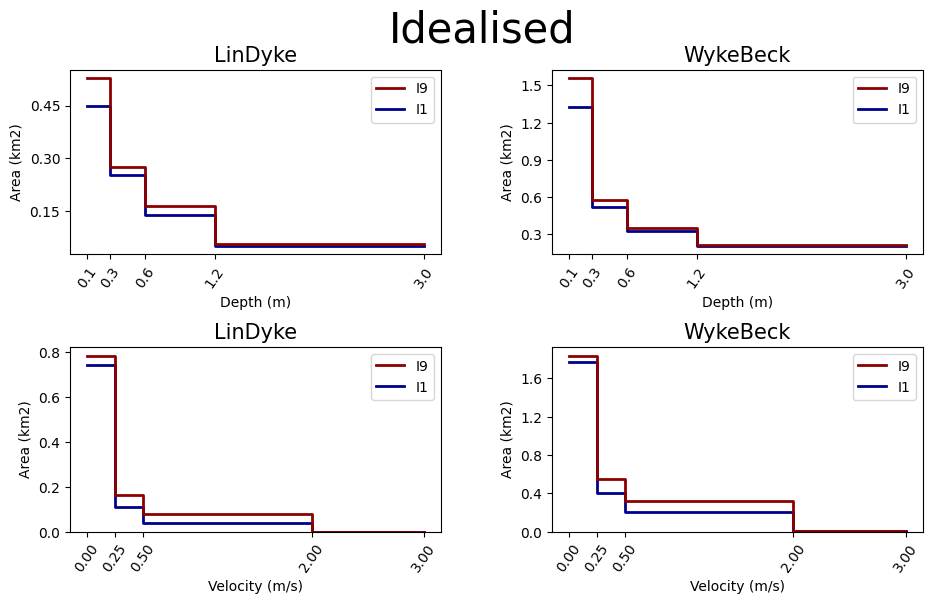

In [31]:
df_idealised_nowater = plot_histogram_weighted(individual_cell_values_ip_dict, 'Idealised','IP','I1', 
                                               'I9', filter_out_water = True,title= True)

In [32]:
# df_observed = plot_histogram_weighted(individual_cell_values_op_dict,'Observed','OP','6h_c8', '6h_c5' , 
#                                       filter_out_water = False,  title= True)

852669
600522
852669
600522
Figs/Histograms/OP_Histograms_withoutwater.PNG


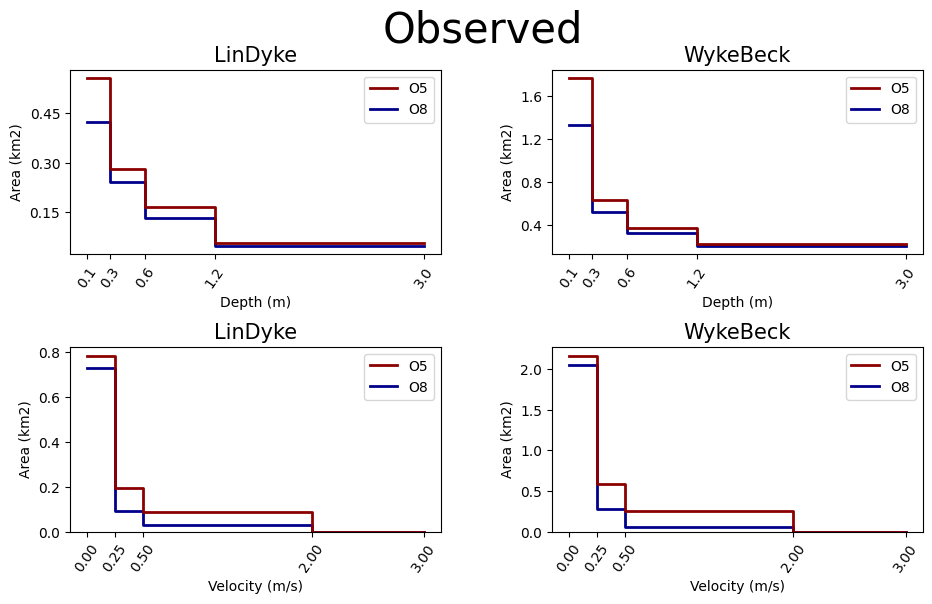

In [33]:
df_observed_nowater = plot_histogram_weighted(individual_cell_values_op_dict, 'Observed', 'OP','O5','O8', 
                                               filter_out_water = True,title= True)

In [34]:
df_observed_nowater[2]

,label,LeastExtreme,MostExtreme,Difference,%Increase,%totalarea_most,%totalarea_least
0,0.0-0.25m/s,0.73,0.78,0.054,7.0,0.74,0.86
1,0.25-0.5m/s,0.09,0.19,0.100,111.0,0.18,0.11
2,0.5-2.0m/s,0.03,0.09,0.058,193.0,0.08,0.04
3,2.0-3.0m/s,0.00,0.00,0.000,NaN,0.00,0.00
4,>3m/s,0.00,0.00,0.000,NaN,0.00,0.00


In [35]:
df_observed_nowater[3]

,label,LeastExtreme,MostExtreme,Difference,%Increase,%totalarea_most,%totalarea_least
0,0.0-0.25m/s,2.06,2.17,0.112,5.0,0.72,0.86
1,0.25-0.5m/s,0.28,0.59,0.302,108.0,0.20,0.12
2,0.5-2.0m/s,0.06,0.26,0.196,327.0,0.09,0.02
3,2.0-3.0m/s,0.00,0.00,0.000,NaN,0.00,0.00
4,>3m/s,0.00,0.00,0.000,NaN,0.00,0.00


In [36]:
def find_numbers_in_bins (df_list_idealised, df_list_observed, FloodedAreaColumn, ld_col_num, wb_col_num):
    # Create dataframe with the difference between two most extreme profiles for catchment/profile combos
    # for the different bins
    df = pd.DataFrame({"label":df_list_idealised[ld_col_num]['label'],
                      'LD_Idealised':df_list_idealised[ld_col_num]['Difference'],
                      'LD_Observed':df_list_observed[ld_col_num]['Difference'],
                       'WB_Idealised':df_list_idealised[wb_col_num]['Difference'],
                      'WB_Observed':df_list_observed[wb_col_num]['Difference']})
    
    # Add a column with the total difference between 2 extremes across all bins
    len_df = len(df)
    df.loc[len(df)] = df.iloc[0:len_df,].sum(axis=0)
    df.iloc[(len_df, 0)] = 'TotalDiffBetweenExtremes_fromthisDF'
    
    # Add a row containing the total difference across all bins (tis comes from cluster_results), rather than
    # summing the previous rows 
    ld_ip_diff = round(cluster_results_ip_ld[FloodedAreaColumn][8] - cluster_results_ip_ld[FloodedAreaColumn][0],3)
    wb_ip_diff = round(cluster_results_ip_wb[FloodedAreaColumn][8] - cluster_results_ip_wb[FloodedAreaColumn][0],3)
    ld_op_diff = round(cluster_results_op_ld[FloodedAreaColumn][15] - cluster_results_op_ld[FloodedAreaColumn][2],3)
    wb_op_diff = round(cluster_results_op_wb[FloodedAreaColumn][15] - cluster_results_op_wb[FloodedAreaColumn][2],3)
    # Make this into a row
    list_row = ["TotalDiffBetweenExtremes_fromClusterResults",ld_ip_diff, ld_op_diff, wb_ip_diff, wb_op_diff]
    # Add to dataframe 
    df.loc[len(df)] = list_row
    
    # Add columns with the percent of the total difference between the two most extreme scenarios that is found
    # in each of the bins 
    df['LD_Idealised_%'] = round(df['LD_Idealised']/ld_ip_diff,2)*100
    df['LD_Observed_%'] = round(df['LD_Observed']/ld_op_diff,2)*100
    df['WB_Idealised_%'] = round(df['WB_Idealised']/wb_ip_diff,2)*100
    df['WB_Observed_%'] = round(df['WB_Observed']/wb_op_diff,2)*100
    
    # Reformat
    df = df.set_index('label').T
    
    return (df)

In [38]:
df_depth_nowater =  find_numbers_in_bins(df_idealised_nowater, df_observed_nowater, 'NotwaterFloodedArea', 0, 1)
df_depth_nowater

label,0.1-0.3m,0.3-0.6m,0.6-1.2m,1.2-3m,>3m,TotalDiffBetweenExtremes_fromthisDF,TotalDiffBetweenExtremes_fromClusterResults
LD_Idealised,0.079,0.023,0.026,0.006,0.0001,0.1341,0.134
LD_Observed,0.132,0.038,0.033,0.009,-0.0001,0.2119,0.212
WB_Idealised,0.232,0.057,0.025,0.008,0.0002,0.3222,0.323
WB_Observed,0.435,0.112,0.045,0.017,-0.0001,0.6089,0.610
LD_Idealised_%,59.000,17.000,19.000,4.000,0.0000,100.0000,100.000
LD_Observed_%,62.000,18.000,16.000,4.000,-0.0000,100.0000,100.000
WB_Idealised_%,72.000,18.000,8.000,2.000,0.0000,100.0000,100.000
WB_Observed_%,71.000,18.000,7.000,3.000,-0.0000,100.0000,100.000


In [39]:
df_velocity_nowater =  find_numbers_in_bins(df_idealised_nowater, df_observed_nowater, 'NotwaterFloodedArea', 2, 3)
df_velocity_nowater#.to_csv("test.csv")

label,0.0-0.25m/s,0.25-0.5m/s,0.5-2.0m/s,2.0-3.0m/s,>3m/s,TotalDiffBetweenExtremes_fromthisDF,TotalDiffBetweenExtremes_fromClusterResults
LD_Idealised,0.043,0.053,0.039,0.000,0.0000,0.1350,0.134
LD_Observed,0.054,0.100,0.058,0.000,0.0000,0.2120,0.212
WB_Idealised,0.063,0.140,0.117,0.002,0.0005,0.3225,0.323
WB_Observed,0.112,0.302,0.196,0.000,0.0000,0.6100,0.610
LD_Idealised_%,32.000,40.000,29.000,0.000,0.0000,101.0000,100.000
LD_Observed_%,25.000,47.000,27.000,0.000,0.0000,100.0000,100.000
WB_Idealised_%,20.000,43.000,36.000,1.000,0.0000,100.0000,100.000
WB_Observed_%,18.000,50.000,32.000,0.000,0.0000,100.0000,100.000


### Hazard

In [44]:
def hazard_plot(individual_cell_values_dict,  profiles_name, profiles_name_short, smallest_method_str,
                    largest_method_str,filter_out_water, title = True):
    
    fig, axs = plt.subplots(ncols= 2, nrows=1, sharey=False,figsize = (12,3), gridspec_kw={'hspace':1, 'wspace': 0.2})
    catchments = ['LinDyke', 'WykeBeck']
    hazard_cats_ls = []
    ##############################
    # Plot number of flooded cells
    ##############################
    for ax_number, ax in enumerate(axs.flatten()):
        catchment_name = catchments[ax_number]
        if catchment_name == "LinDyke":
            cell_size_in_m2 = 1
        elif catchment_name == "WykeBeck":
            cell_size_in_m2 = 4
        
        # Get data
        individual_cell_values =  individual_cell_values_dict[catchment_name]
        # Filter out cells which are water
        if filter_out_water == True:
            individual_cell_values = individual_cell_values[individual_cell_values['Water_class']==15]
        
        # Get biggest/smallest method data
        largest_method = individual_cell_values[individual_cell_values['short_id'] == largest_method_str]
        smallest_method = individual_cell_values[individual_cell_values['short_id'] == smallest_method_str]
        
        largest_method_val = np.unique(largest_method['Hazard'],return_counts=True)[1]
        smallest_method_val = np.unique(smallest_method['Hazard'],return_counts=True)[1]
        
        largest_method_val =  largest_method_val * (cell_size_in_m2/1000000)
        smallest_method_val =  smallest_method_val* (cell_size_in_m2/1000000)
        
        # make dataframe
        hazard_cats =pd.DataFrame({'Hazard_cat':['Low', 'Moderate', 'Significant', 'Extreme'],
                                  smallest_method_str: smallest_method_val,
                                   largest_method_str:largest_method_val})
        
        # Drop NA row
        #hazard_cats = hazard_cats[:-1]
        
        # Plot
        hazard_cats.set_index('Hazard_cat').plot.bar(ax=axs[ax_number], rot = 0,  width=0.8, color=['darkblue', 'darkred'])
            
        if title == True:
            axs[ax_number].set_title(catchments[ax_number],fontsize=15)      
        
        ax.set_ylabel("Area (km2)")
        ax.set_xlabel('')
        
        hazard_cats_ls.append(hazard_cats)
        
    fig.suptitle(profiles_name, fontsize=20, y=1.065)    
    if filter_out_water == False:
        fp_to_save =  "Figs/HazardPlots/{}_HazardCats.PNG".format(profiles_name_short)
        fig.savefig(fp_to_save, bbox_inches='tight')
    elif filter_out_water == True:
        fp_to_save = "Figs/HazardPlots/{}_HazardCats_withoutwater.PNG".format(profiles_name_short)
        fig.savefig(fp_to_save, bbox_inches='tight')
    print(fp_to_save)
    return(hazard_cats_ls)

In [ ]:
# hazard_plot(individual_cell_values_ip_dict, 'Idealised', 'IP', '6h_sp_fl_0.1', '6h_sp_bl_0.9', filter_out_water= False)

Figs/HazardPlots/OP_HazardCats_withoutwater.PNG


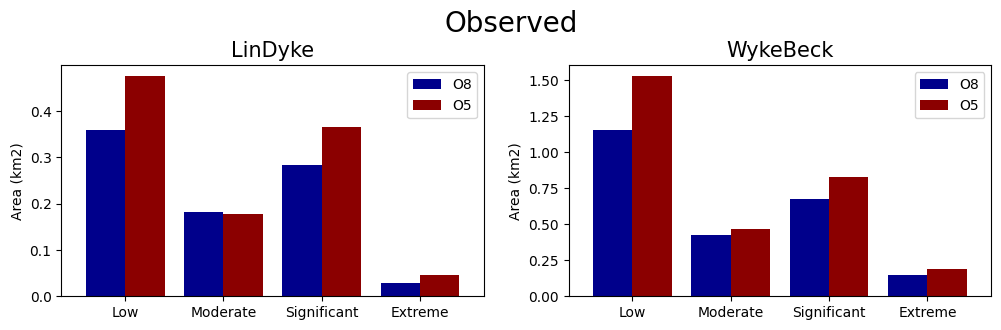

In [45]:
tes = hazard_plot(individual_cell_values_op_dict, 'Observed', 'OP', 'O8', 'O5', filter_out_water= True)

Figs/HazardPlots/IP_HazardCats_withoutwater.PNG


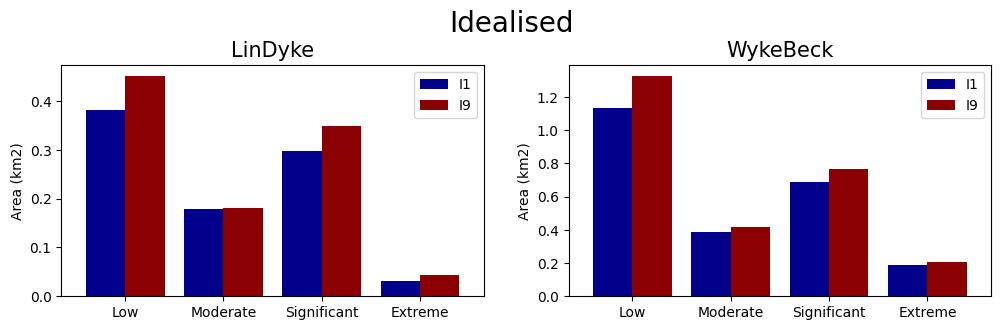

In [42]:
tes = hazard_plot(individual_cell_values_ip_dict, 'Idealised', 'IP', 'I1', 'I9', filter_out_water= True)

In [50]:
tes[1]['O5'].sum()

3.0117519999999995

In [49]:
tes[0]['O8'].sum()

0.852669

In [114]:
tes[1]['I9'].sum()

2.7208439999999996

In [102]:
tes['I9'].sum()

1.774868

In [101]:
tes['I1'].sum()

1.4452279999999997

In [34]:
# hazard_plot(individual_cell_values_op_dict, 'Observed', 'OP','6h_c8', '6h_c5', filter_out_water= False)

Figs/HazardPlots/OP_HazardCats_withoutwater.PNG


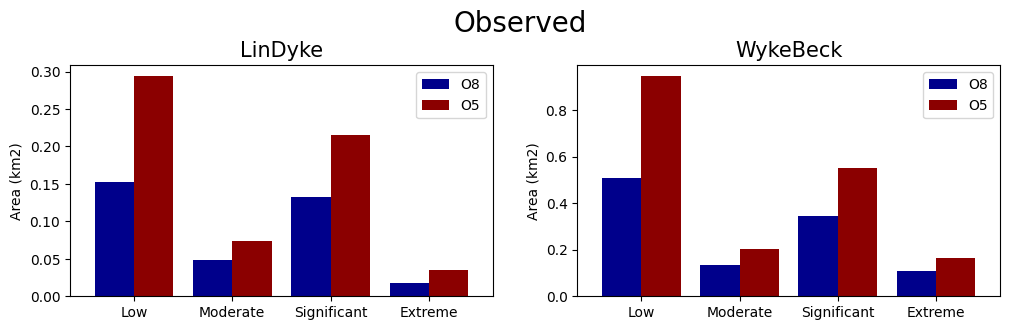

In [65]:
hazard_plot(individual_cell_values_op_dict, 'Observed', 'OP','O8', 'O5', filter_out_water= True)

## Flow timeseries

In [36]:
# profile_line_names_ld = ['KippaxBeck', 'SheffieldBeck', 'LinDyke']
# profile_line_names_wb = ['WykeBeck','WykeBeck_YorkRoad','WykeBeck_PontefractLane','OtherStream_AheadOfConfluence',
#                      'CatchmentBottom']
# profile_line_names_wb_forplot = ['WykeBeck','WB (YorkRd)','WB (PontefractLane)','OtherStream',
#                      'CatchmentBottom']

# profile_line_names={'LinDyke':profile_line_names_ld, 'WykeBeck': profile_line_names_wb}

In [37]:
# catchment_name = 'LinDyke'
# catchment_name_short = "LD"
# sharey= False

# if sharey == True:
#     sharey_identifier = "_sharey"
# else:
#     sharey_identifier = ''

# # Make the plot
# fig, axs = plt.subplots(nrows=2,ncols=len(profile_line_names[catchment_name]), figsize = (14,6), sharex=True, sharey=sharey)

# # Additional loop:
# for methods_num, methods_key in enumerate(["Idealised", 'Observed']):
#     # Get
#     colors = colors_ls[methods_key]
#     model_directory = '../../FloodModelling/{}Models/Model_{}Profiles/'.format(catchment_name, methods_key)
    
#     # Create the column names used in the Hec-Ras flow timeseries output
#     methods = methods_dict[methods_key]
#     methods=methods[1:]
#     column_names = ['Time (03/08/2022)']
#     for method in methods:
#         column_names.append(method + ' [Post Processed] (CMS)')
    
#     # Loop through each of the profile line location and create a subplot with the flow timeseries lines for each rainfall profile
#     for axs_numb, profile_line in enumerate(profile_line_names[catchment_name]):
#         # Read in data and reorder columns
#         flow_timeseries = pd.read_csv(model_directory + "FlowLines/{}.csv".format(profile_line))[column_names]
#         # Trim off end
#         flow_timeseries = flow_timeseries[:700]
        
#         # Get FEH data
#         feh_flow_timeseries = pd.read_csv('../../FloodModelling/{}Models/Model_FEHProfiles/FlowLines/{}.csv'.format(catchment_name, profile_line))
#         feh_flow_timeseries = feh_flow_timeseries[:700]
        
#         # Plot each line
#         for number, column in enumerate(flow_timeseries.columns[1:]):
#             axs[methods_num,axs_numb].plot(flow_timeseries[column], color = colors[number])
#             axs[methods_num,axs_numb].plot(feh_flow_timeseries['6h_feh_singlepeak [Post Processed] (CMS)'], color = 'black',
#                                           linestyle='dashed')
            
#             # Add flow label to just the left hand plot
#             if axs_numb ==0:
#                 axs[methods_num, axs_numb].set_ylabel('Flow (cumecs)')
#             #  Add minute label if bottom row
#             if methods_num ==1:
#                 axs[methods_num, axs_numb].set_xlabel('Minute')                    
#             # Add the catchment names (using modified ones for WB)    
#             if catchment_name == 'LinDyke':    
#                 axs[methods_num,axs_numb].text(0.03, 0.98, profile_line_names[catchment_name][axs_numb],
#                                                horizontalalignment='left',verticalalignment='top',
#                                                 transform = axs[methods_num,axs_numb].transAxes)
#                  # Add row title 
#                 if axs_numb ==1:
#                     axs[methods_num,axs_numb].set_title(methods_key, fontsize=16)   
#             else:
#                 axs[methods_num,axs_numb].text(0.03, 0.98, profile_line_names_wb_forplot[axs_numb],
#                                                horizontalalignment='left',verticalalignment='top',
#                                                 transform = axs[methods_num,axs_numb].transAxes)
#                  # Add row title 
#                 if axs_numb ==2:
#                     axs[methods_num,axs_numb].set_title(methods_key, fontsize=16)                   
         
            
# # Legend
# colors = ['black','darkblue', 'paleturquoise', 'grey', 'indianred', 'darkred']
# texts = ['FEH','F2','F1','C', 'B1', 'B2'] 
# patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
# plt.legend(handles=patches, bbox_to_anchor=(1.25, 1), loc='center', ncol=1, prop={'size': 9} )

# # fig.suptitle(catchment_name, fontsize=20)
# figname = "../ProcessModelResults/Outputs/Figs/BothProfiles/{}/{}_FlowTimeSeries{}.PNG".format(catchment_name, 
#                                                                                           catchment_name_short, sharey_identifier)

# plt.subplots_adjust(wspace=0.25)
# fig.savefig(figname,bbox_inches='tight')

## Plot flooded area over time